In [92]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


<AxesSubplot: >

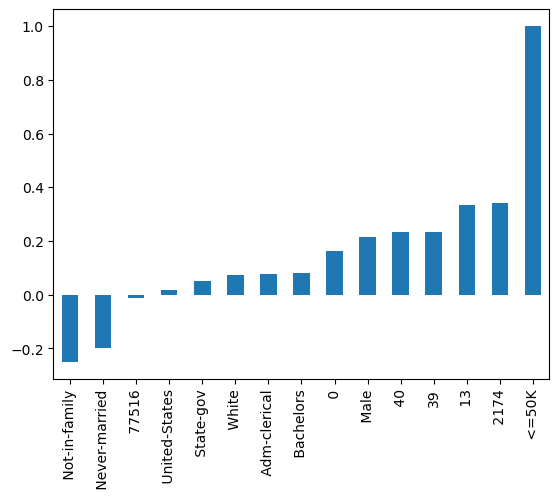

In [93]:
df = pd.read_csv('adult.data')
le = preprocessing.LabelEncoder()
label = df[' <=50K']
for i in df.columns:
    df[i] = le.fit_transform(df[i])
df = df.fillna(0)  
df.corrwith(df[' <=50K']).sort_values(ascending=True).plot(kind='bar')

In [94]:
X = df[df.columns[:-2]]
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [106]:
def train_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    conf = confusion_matrix(y_test,y_pred)
    print('confusion matrix: \n',conf)
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy: ',acc)
    res = classification_report(y_test,y_pred)
    print('results:  \n',res)

In [96]:
model = DecisionTreeClassifier()
train_model(model1)

confusion matrix:  [[4598  305]
 [ 889  720]]
Accuracy:  0.8166461916461917
results:                 precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4903
        >50K       0.70      0.45      0.55      1609

    accuracy                           0.82      6512
   macro avg       0.77      0.69      0.72      6512
weighted avg       0.80      0.82      0.80      6512



In [97]:
# precision of model without droping columns having low corelation is 0.8111179361179361

In [98]:
df = df.drop([' 77516', ' United-States', ' State-gov'], axis = 1)

In [99]:
X = df[df.columns[:-2]]
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = DecisionTreeClassifier()
train_model(model)

confusion matrix:  [[4484  472]
 [ 620  936]]
Accuracy:  0.8323095823095823
results:                 precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      4956
        >50K       0.66      0.60      0.63      1556

    accuracy                           0.83      6512
   macro avg       0.77      0.75      0.76      6512
weighted avg       0.83      0.83      0.83      6512



In [100]:
# precision of model after droping columns having low corelation is increased to 0.8290847665847666

In [101]:
model1 = GaussianNB()
train_model(model)

confusion matrix:  [[4492  464]
 [ 618  938]]
Accuracy:  0.8338452088452089
results:                 precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      4956
        >50K       0.67      0.60      0.63      1556

    accuracy                           0.83      6512
   macro avg       0.77      0.75      0.76      6512
weighted avg       0.83      0.83      0.83      6512



In [108]:
model2 = RandomForestClassifier(n_estimators=3)
train_model(model)

confusion matrix: 
 [[4487  469]
 [ 613  943]]
Accuracy:  0.8338452088452089
results:  
               precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      4956
        >50K       0.67      0.61      0.64      1556

    accuracy                           0.83      6512
   macro avg       0.77      0.76      0.76      6512
weighted avg       0.83      0.83      0.83      6512



In [109]:
models = [model, model1, model2]

In [110]:
for i in models:
    train_model(i)
    print(50*'-')

confusion matrix: 
 [[4486  470]
 [ 613  943]]
Accuracy:  0.8336916461916462
results:  
               precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      4956
        >50K       0.67      0.61      0.64      1556

    accuracy                           0.83      6512
   macro avg       0.77      0.76      0.76      6512
weighted avg       0.83      0.83      0.83      6512

--------------------------------------------------
confusion matrix: 
 [[4634  322]
 [ 843  713]]
Accuracy:  0.8210995085995086
results:  
               precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4956
        >50K       0.69      0.46      0.55      1556

    accuracy                           0.82      6512
   macro avg       0.77      0.70      0.72      6512
weighted avg       0.81      0.82      0.81      6512

--------------------------------------------------
confusion matrix: 
 [[4481  475]
 [ 579  977]]
Accuracy:  0.838144

[Text(0.6866331571736559, 0.984375, 'x[5] <= 0.5\ngini = 0.366\nsamples = 26048\nvalue = [19763, 6285]'),
 Text(0.44372973849683284, 0.953125, 'x[2] <= 11.5\ngini = 0.495\nsamples = 10567\nvalue = [5792, 4775]'),
 Text(0.3186004513454328, 0.921875, 'x[8] <= 78.0\ngini = 0.446\nsamples = 7410\nvalue = [4923, 2487]'),
 Text(0.21713360601274417, 0.890625, 'x[2] <= 8.5\ngini = 0.42\nsamples = 7025\nvalue = [4916, 2109]'),
 Text(0.10226495159450676, 0.859375, 'x[2] <= 6.5\ngini = 0.36\nsamples = 4444\nvalue = [3398, 1046]'),
 Text(0.029929179642754867, 0.828125, 'x[4] <= 11.5\ngini = 0.181\nsamples = 1073\nvalue = [965, 108]'),
 Text(0.02183394634163803, 0.796875, 'x[9] <= 39.0\ngini = 0.147\nsamples = 862\nvalue = [793, 69]'),
 Text(0.018013271406071018, 0.765625, 'x[2] <= 4.5\ngini = 0.138\nsamples = 847\nvalue = [784, 63]'),
 Text(0.01123102806414662, 0.734375, 'x[8] <= 67.0\ngini = 0.095\nsamples = 480\nvalue = [456, 24]'),
 Text(0.009289089347079038, 0.703125, 'x[4] <= 4.5\ngini = 0.09

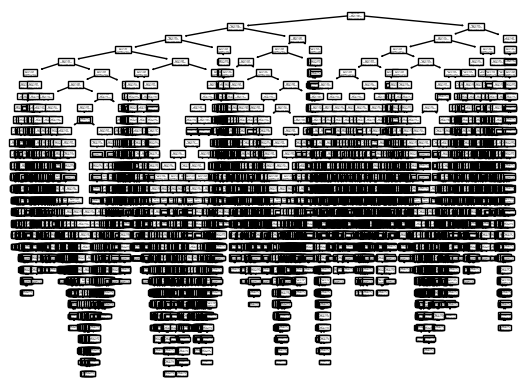

In [115]:
clf = tree.DecisionTreeClassifier(random_state=0)

clf = clf.fit(X_train,y_train)
tree.plot_tree(clf)
